无优化器求得极值点为 (x_1, x_2) = (0.0, 0.0) 


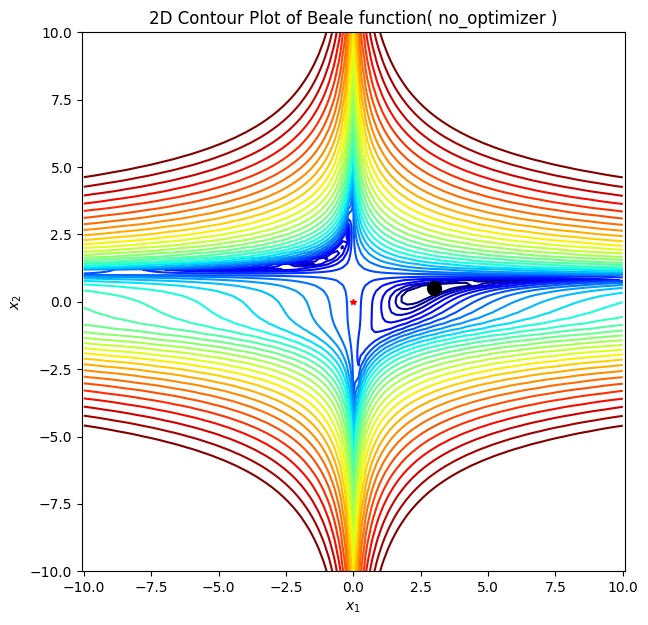

SGD求得极值点为 (x_1, x_2) = (2.9999999999999942, 0.4999999999999984) 


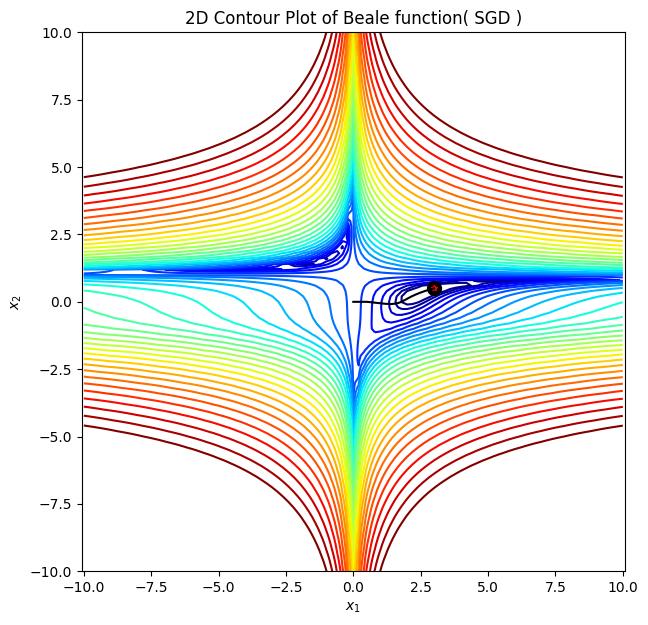

Momentum求得极值点为 (x_1, x_2) = (3.00000000000001, 0.5000000000000024) 


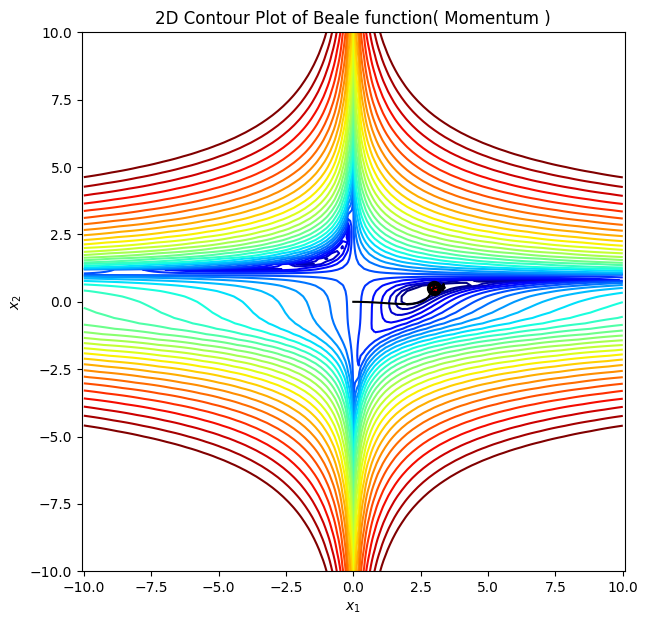

AdaGrad求得极值点为 (x_1, x_2) = (2.999999999811508, 0.4999999999527867) 


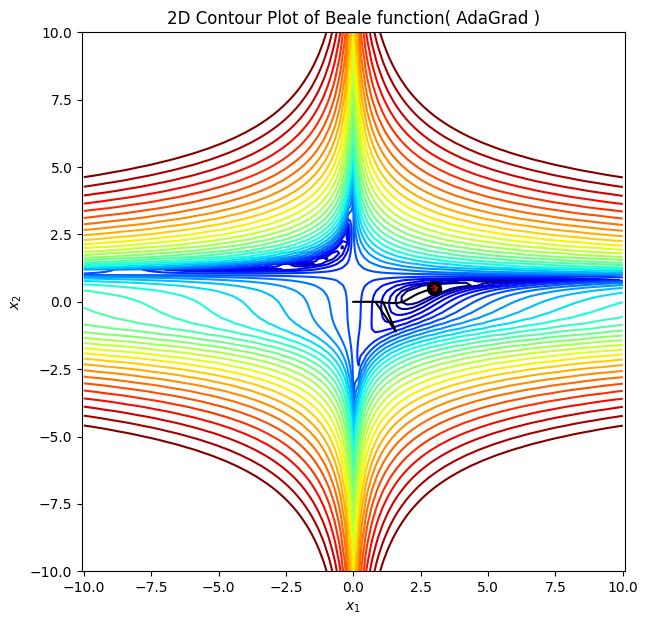

RMSProp求得极值点为 (x_1, x_2) = (3.001786308794198, 0.49414267650158183) 


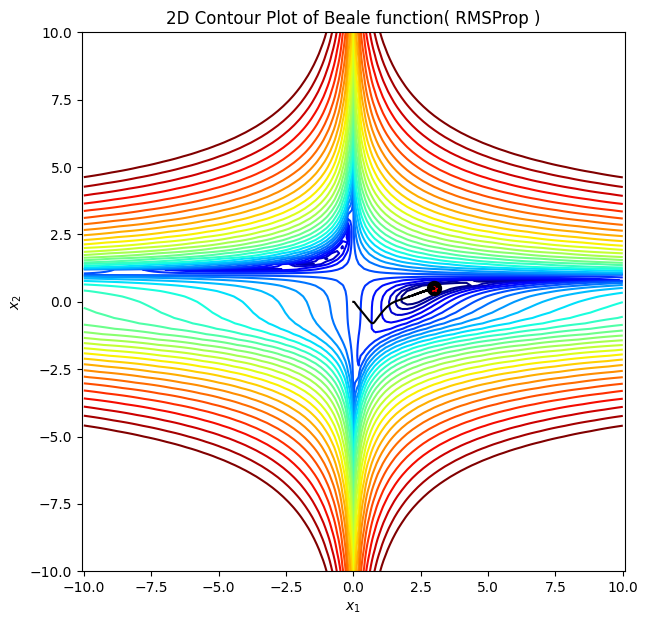

Adam求得极值点为 (x_1, x_2) = (3.0000209460132523, 0.5000213462088533) 


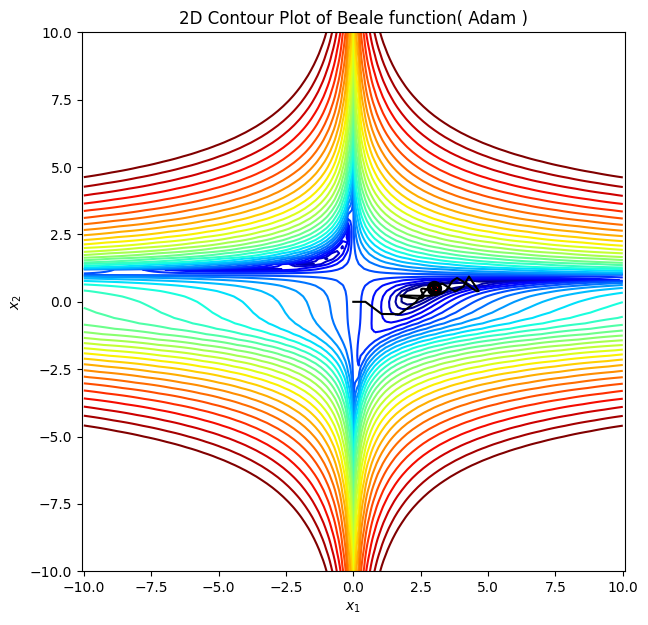

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl # Matplotlib的色阶条
# ------------------定义目标函数beale、目标函数的偏导函数dbeale_dx，并画出目标函数---------------------
#定义beale公式
def beale(x1,x2):
    return (1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2
 
#定义beale公式的偏导函数
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5-x1+x1*x2)*(x2-1)+2*(2.25-x1+x1*x2**2)*(x2**2-1)+2*(2.625-x1+x1*x2**3)*(x2**3-1) # 求beale公式关于x1的偏导数
    dfdx2 = 2*(1.5-x1+x1*x2)*x1+2*(2.25-x1+x1*x2**2)*(2*x1*x2)+2*(2.625-x1+x1*x2**3)*(3*x1*x2**2) # 求beale公式关于x2的偏导数
    return dfdx1, dfdx2

#------------------------------无优化器---------------------------------
def no_opt(x0, iter=500):
    x_traj = [] #存储每次迭代的坐标
    x_traj.append(x0)
    # 由于无优化器不会进行迭代，所以最终的极小值点就是x0
    for i in range(iter):
        x_traj.append(x0)# 添加的始终是同一个值
    return x_traj

def run_no_opt():
    x0 = np.array([0.0, 0.0]) # 初始化坐标
    x_traj = no_opt(x0) # 调用函数进行更新
    print("无优化器求得极值点为 (x_1, x_2) = (%s, %s) " % (x_traj[-1][0], x_traj[-1][1]))
    gd_plot(x_traj, "no_optimizer")

#------------------------------SGD---------------------------------
def SGD(x0, iter=3000, alpha=0.04):
    x_traj = []
    x_traj.append(x0)
    for i in range(iter):
        delta = np.array(dbeale_dx(x_traj[-1][0], x_traj[-1][1])) # 梯度计算
        x_new = x_traj[-1] - delta * alpha # 迭代
        x_traj.append(x_new)
    return x_traj

def run_SGD():
    x0 = np.array([0.0, 0.0]) # 初始化坐标
    x_traj = SGD(x0) # 调用函数进行更新
    print("SGD求得极值点为 (x_1, x_2) = (%s, %s) " % (x_traj[-1][0], x_traj[-1][1]))
    gd_plot(x_traj, "SGD")

#------------------------------Momentum---------------------------------
def Momentum(x0, iter=2500, alpha=0.005, gamma=0.9): # 与SGD相比，多了动量参数
    x_traj = []
    x_traj.append(x0)
    v = np.zeros((2, )) # 最开始没有历史速度
    for i in range(iter):
        delta = np.array(dbeale_dx(x_traj[-1][0], x_traj[-1][1])) # 梯度计算
        v_new = gamma * v - alpha * delta
        x_new = x_traj[-1] + v_new
        v = v_new
        x_traj.append(x_new)
    return x_traj

def run_Momentum():
    x0 = np.array([0.0, 0.0])
    x_traj = Momentum(x0)
    print("Momentum求得极值点为 (x_1, x_2) = (%s, %s) " % (x_traj[-1][0], x_traj[-1][1]))
    gd_plot(x_traj, "Momentum")
#------------------------------AdaGrad---------------------------------
def AdaGrad(x0, iter=1500, alpha=1.1, epsilon=0.00001):
    x_traj = []
    x_traj.append(x0)
    G = 0 # 初始状态为0
    for i in range(iter):
        delta = np.array(dbeale_dx(x_traj[-1][0], x_traj[-1][1])) # 梯度计算
        G += delta ** 2
        alpha_new = alpha / (np.sqrt(G) + epsilon)
        x_new = x_traj[-1] - alpha_new * delta
        x_traj.append(x_new)
    return x_traj

def run_AdaGram():
    x0 = np.array([0.0, 0.0])
    x_traj = AdaGrad(x0)
    print("AdaGrad求得极值点为 (x_1, x_2) = (%s, %s) " % (x_traj[-1][0], x_traj[-1][1]))
    gd_plot(x_traj, "AdaGrad")

#------------------------------RMSProp---------------------------------
def RMSProp(x0, iter=500, alpha=0.01, gamma=0.9, epsilon=0.00001):
    x_traj = []
    x_traj.append(x0)
    v = 0 # 最开始没有历史速度
    for i in range(iter):
        delta = np.array(dbeale_dx(x_traj[-1][0], x_traj[-1][1])) # 梯度计算
        v_new = gamma * v + (1 - gamma) * (delta ** 2)
        alpha_new = alpha / (np.sqrt(v_new) + epsilon)
        x_new = x_traj[-1] - alpha_new * delta
        v = v_new
        x_traj.append(x_new)
    return x_traj

def run_RMSProp():
    x0 = np.array([0.0, 0.0])
    x_traj = RMSProp(x0)
    print("RMSProp求得极值点为 (x_1, x_2) = (%s, %s) " % (x_traj[-1][0], x_traj[-1][1]))
    gd_plot(x_traj, "RMSProp")

#------------------------------Adam---------------------------------
def Adam(x0, iter=210, alpha=0.45, beta1=0.9, beta2=0.99, epsilon=0.00001):
    x_traj = []
    x_traj.append(x0)
    m, v = 0, 0
    for i in range(iter):
        delta  = np.array(dbeale_dx(x_traj[-1][0], x_traj[-1][1])) # 梯度计算
        m_new  = beta1 * m - (1 - beta1) * delta
        v_new  = beta2 * v + (1 - beta2) * (delta ** 2)
        m_new_ = m_new / (1 - beta1)
        v_new_ = v_new / (1 - beta2)
        m, v   = m_new, v_new
        alpha_new = alpha / (np.sqrt(v_new_) + epsilon)
        x_new  = x_traj[-1] + alpha_new * m_new_
        x_traj.append(x_new)
    return x_traj

def run_Adam():
    x0 = np.array([0.0, 0.0])
    x_traj = Adam(x0)
    print("Adam求得极值点为 (x_1, x_2) = (%s, %s) " % (x_traj[-1][0], x_traj[-1][1]))
    gd_plot(x_traj, "Adam")

#------------------------------定义画图函数------------------------------
def gd_plot(x_traj, belonging):
    X1, X2 = np.meshgrid(np.arange(-10, 10.2, 0.2),np.arange(-10, 10.2, 0.2))
    plt.rcParams['figure.figsize'] = [7, 7] # 窗口大小
    plt.contour(X1, X2, beale(X1, X2), levels=np.logspace(0, 6, 30), norm=plt_cl.LogNorm(), cmap=plt.cm.jet) # 画等高线图
    plt.title('2D Contour Plot of Beale function( ' + belonging + ' )') # 添加标题
    plt.xlabel('$x_1$') # x轴标签
    plt.ylabel('$x_2$') # y轴标签
    plt.axis('equal') # 设置坐标轴为正方形
    plt.plot(3, 0.5, 'ko', markersize=10) # 真实极值点，黑色圆形，change
    plt.plot(x_traj[-1][0], x_traj[-1][1], 'r*', markersize=4) # 画出最低点，这里修改为最终迭代的坐标，红色五角星，change
    if x_traj is not None:
        x_traj = np.array(x_traj) 
        # 以x_traj的第一列为x轴坐标，第二列为y轴坐标进行画图
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-') 
    plt.show()
    


'''在华为云notebook运行时可任选其中两个运行（超过两个的话会自动生成小窗口，，无法显示完全，，'''
run_no_opt()
run_SGD()
run_Momentum()
run_AdaGram()
run_RMSProp()
run_Adam()